In [36]:
using Plots
include("layers.jl")

color (generic function with 1 method)

In [2]:
layer1 = FullyConnected(size=(5, 3))
layer2 = FullyConnected(size=(9, 5))
layer3 = FullyConnected(size=(1, 9))
net = Network([layer1, layer2, layer3]);

In [4]:
x = [1., 2., 4.]
@time forward(x, net)
net.depth
y = 1
@time backward(y, net)
@time update(net)

  0.000063 seconds (59 allocations: 3.578 KiB)
  0.000510 seconds (244 allocations: 8.859 KiB)
  0.000013 seconds (15 allocations: 2.078 KiB)


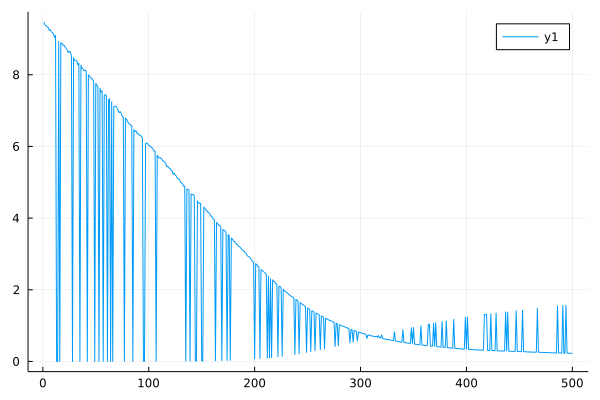

In [29]:
net = Network([FullyConnected(size=(8, 2), activation=sigmoid),
               FullyConnected(size=(20, 8), activation=sigmoid),
               FullyConnected(size=(1, 20), activation=sigmoid)]);
X = [];
Y = [];
losses = [];
n = 10000;
for i in 1:n
    x = rand(2)
    if x[1] + x[2] < 0.5
        y = 1
    else
        y = 0
    end
    X = append!(X, [x])
    Y = append!(Y, y) 

    forward(x, net)
    backward(y, net)
    update(net)
    if i % 20 == 0
    losses = append!(losses, net.loss)
    end
end
X1 = [X[i][1] for i in 1:n]
X2 = [X[i][2] for i in 1:n]
Yp = predict(net, X)
plot(losses)


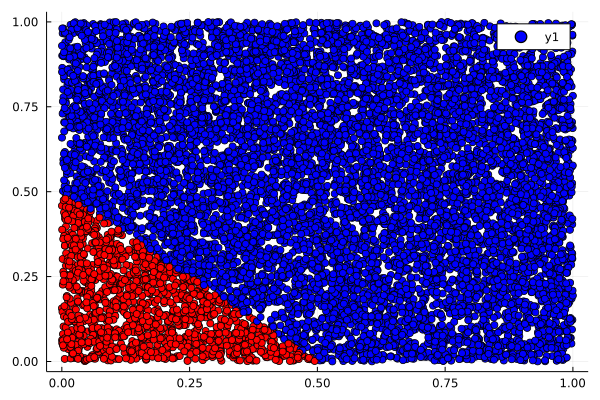

In [32]:
plot(X1, X2, markercolor=color.(Y), seriestype=:scatter)

In [49]:
X = [];
Yt = [];
n = 10000;
for i in 1:n
    x = rand(2)
    if (x[1] - 0.5)^2 + (x[2] - 0.5)^2 < 0.05
        y = 1
    else
        y = 0
    end
    X = append!(X, [x])
    Yt = append!(Yt, y) 
end
X1 = [X[i][1] for i in 1:n]
X2 = [X[i][2] for i in 1:n]

net = Network([FullyConnected(size=(8, 2), activation=sigmoid),
               FullyConnected(size=(20, 8), activation=sigmoid),
               FullyConnected(size=(1, 20), activation=sigmoid)]);
train(net, X, Yt, 1e-2, 256, 1e3)
Yp = predict(net, X)
println(100. * count(Yp - Yt .== 0) / n, "% success rate")

84.59% success rate


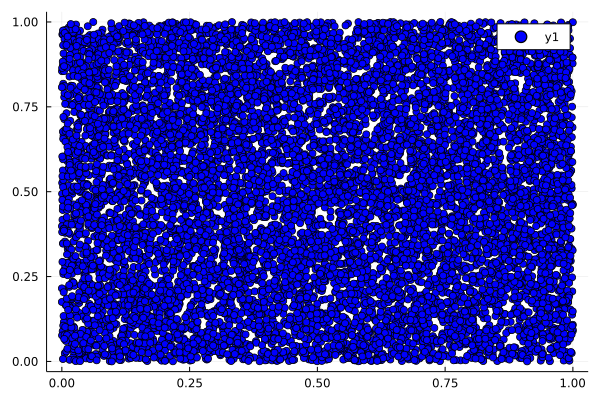

In [51]:
plot(X1, X2, markercolor=color.(Yp), seriestype=:scatter)